# Insurance cross selling prediction

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset
train=pd.read_csv('train_hackathon.csv')
test=pd.read_csv('test_hackathon.csv')

# EDA AND DATA CLEANING

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
train.shape

(381109, 12)

In [6]:
test.shape

(127037, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
train['Response'].value_counts(normalize=True)

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

In [11]:
train['Gender'].value_counts(normalize=True).reset_index()

,Gender,proportion
0,Male,0.540761
1,Female,0.459239


In [12]:
train['Gender']=train['Gender'].replace({'Male':1,'Female':0})

In [13]:
train['Vehicle_Age'].value_counts(normalize=True)

Vehicle_Age
1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: proportion, dtype: float64

In [14]:
train['Vehicle_Age']=train['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

In [15]:
train['Vehicle_Damage'].value_counts(normalize=True)

Vehicle_Damage
Yes    0.504877
No     0.495123
Name: proportion, dtype: float64

In [16]:
train['Vehicle_Damage']=train['Vehicle_Damage'].replace({'Yes':1,'No':0})

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


<Axes: xlabel='Gender', ylabel='Age'>

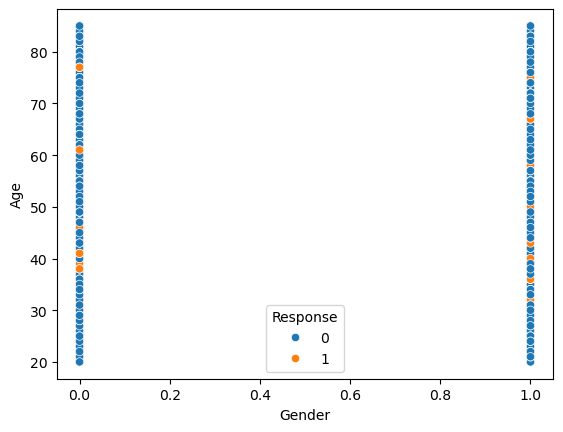

In [18]:
sns.scatterplot(x='Gender', y='Age',hue='Response',data=train)

<Axes: xlabel='Gender', ylabel='Driving_License'>

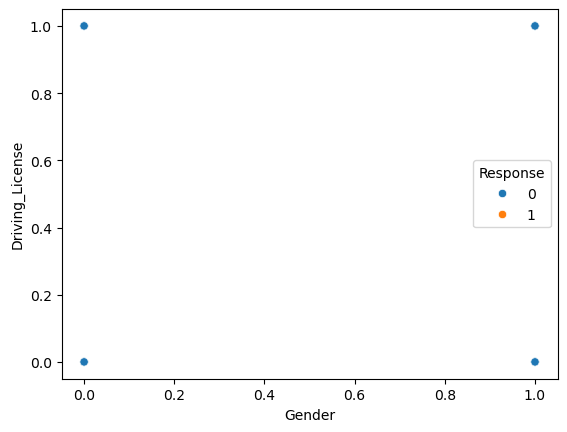

In [19]:
sns.scatterplot(x='Gender', y='Driving_License',hue='Response',data=train)

<Axes: xlabel='Region_Code', ylabel='Vehicle_Damage'>

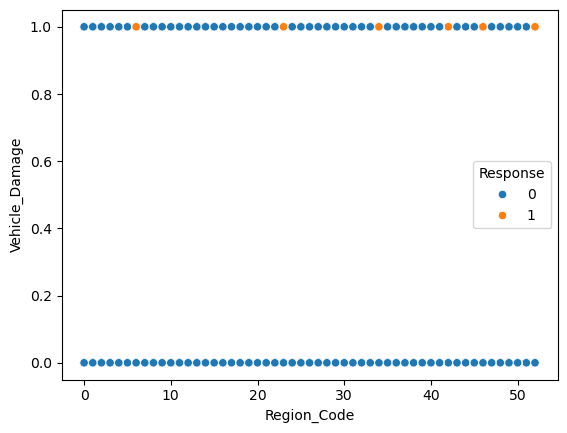

In [20]:
sns.scatterplot(x='Region_Code', y='Vehicle_Damage',hue='Response',data=train)

<Axes: >

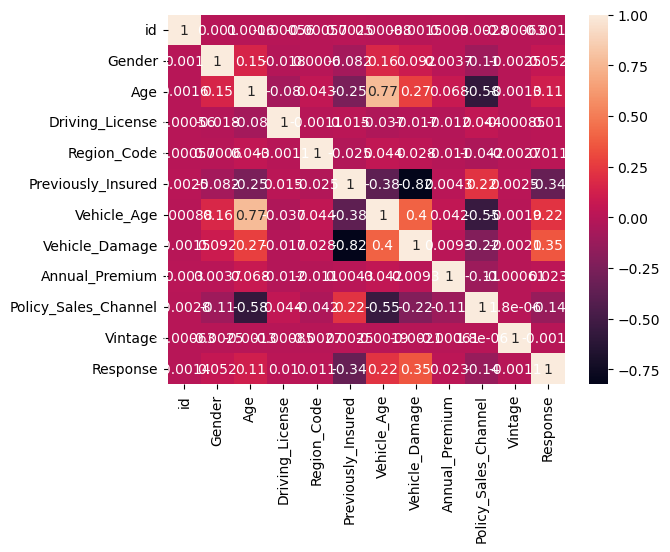

In [21]:
sns.heatmap(train.corr(),annot=True)

In [22]:
train.corr()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.000999,0.001561,-0.000564,-0.000572,0.002457,0.000878,-0.001507,0.003027,-0.002837,-0.000630,-0.001368
Gender,0.000999,1.000000,0.145545,-0.018374,0.000604,-0.081932,0.160427,0.091606,0.003673,-0.111159,-0.002517,0.052440
Age,0.001561,0.145545,1.000000,-0.079782,0.042574,-0.254682,0.765790,0.267534,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.018374,-0.079782,1.000000,-0.001081,0.014969,-0.037306,-0.016622,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.000604,0.042574,-0.001081,1.000000,-0.024659,0.043778,0.028235,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.081932,-0.254682,0.014969,-0.024659,1.000000,-0.380873,-0.824143,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,0.000878,0.160427,0.765790,-0.037306,0.043778,-0.380873,1.000000,0.396873,0.041580,-0.550663,-0.001892,0.221874
Vehicle_Damage,-0.001507,0.091606,0.267534,-0.016622,0.028235,-0.824143,0.396873,1.000000,0.009349,-0.224377,-0.002064,0.354400
Annual_Premium,0.003027,0.003673,0.067507,-0.011906,-0.010588,0.004269,0.041580,0.009349,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.111159,-0.577826,0.043731,-0.042420,0.219381,-0.550663,-0.224377,-0.113247,1.000000,0.000002,-0.139042


In [23]:
train['id'].value_counts()

id
1         1
254071    1
254080    1
254079    1
254078    1
         ..
127035    1
127034    1
127033    1
127032    1
381109    1
Name: count, Length: 381109, dtype: int64

In [24]:
# id which is customer id is a unique number which can be dropped from data 
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

In [25]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [26]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [27]:
X=train.drop('Response',axis=1)

In [28]:
X

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,1,76,1,3.0,0,1,0,33536.0,26.0,183
2,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,1,21,1,11.0,1,0,0,28619.0,152.0,203
4,0,29,1,41.0,1,0,0,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,1,0,30170.0,26.0,88
381105,1,30,1,37.0,1,0,0,40016.0,152.0,131
381106,1,21,1,30.0,1,0,0,35118.0,160.0,161
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74


In [29]:
y=train['Response']

In [30]:
y

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [31]:
scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X))

In [32]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.369231,1.0,0.538462,0.0,1.0,1.0,0.070366,0.154321,0.716263
1,1.0,0.861538,1.0,0.057692,0.0,0.5,0.0,0.057496,0.154321,0.598616
2,1.0,0.415385,1.0,0.538462,0.0,1.0,1.0,0.066347,0.154321,0.058824
3,1.0,0.015385,1.0,0.211538,1.0,0.0,0.0,0.048348,0.932099,0.667820
4,0.0,0.138462,1.0,0.788462,1.0,0.0,0.0,0.046259,0.932099,0.100346


In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)

In [34]:
X_train.shape  ,X_test.shape  ,y_train.shape  ,y_test.shape

((304887, 10), (76222, 10), (304887,), (76222,))

In [35]:
def model_pred_results(X_train,X_test,y_train,y_test,model):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    print('Train accuracy: ', accuracy_score(y_train, train_pred))
    print('Test accuracy: ', accuracy_score(y_test, test_pred))
    print('Train classification report: ', classification_report(y_train, train_pred))
    print('Test classification report: ', classification_report(y_test, test_pred))
    print('Train confusion matrix:', confusion_matrix(y_train, train_pred))
    print('Test confusion matrix:', confusion_matrix(y_test, test_pred))

    return accuracy_score(y_train, train_pred), accuracy_score(y_test, test_pred)
    

In [36]:
rf=RandomForestClassifier()
train_accuracy, test_accuracy=model_pred_results(X_train,X_test,y_train,y_test,rf)

Train accuracy:  0.9998294450074946
Test accuracy:  0.8663246831623416
Train classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    267543
           1       1.00      1.00      1.00     37344

    accuracy                           1.00    304887
   macro avg       1.00      1.00      1.00    304887
weighted avg       1.00      1.00      1.00    304887

Test classification report:                precision    recall  f1-score   support

           0       0.89      0.97      0.93     66856
           1       0.37      0.12      0.18      9366

    accuracy                           0.87     76222
   macro avg       0.63      0.55      0.56     76222
weighted avg       0.82      0.87      0.84     76222

Train confusion matrix: [[267529     14]
 [    38  37306]]
Test confusion matrix: [[64881  1975]
 [ 8214  1152]]


In [40]:
joblib.dump(rf,'insurance_cross_sell_predictionmodel.pkl',compress=9)

['insurance_cross_sell_predictionmodel.pkl']